In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#data gathering
data=pd.read_csv(r"c:\Users\\acer\\Downloads\iris.csv")

In [3]:
#data preprocessing
data.drop(['Id'],axis=1,inplace=True)

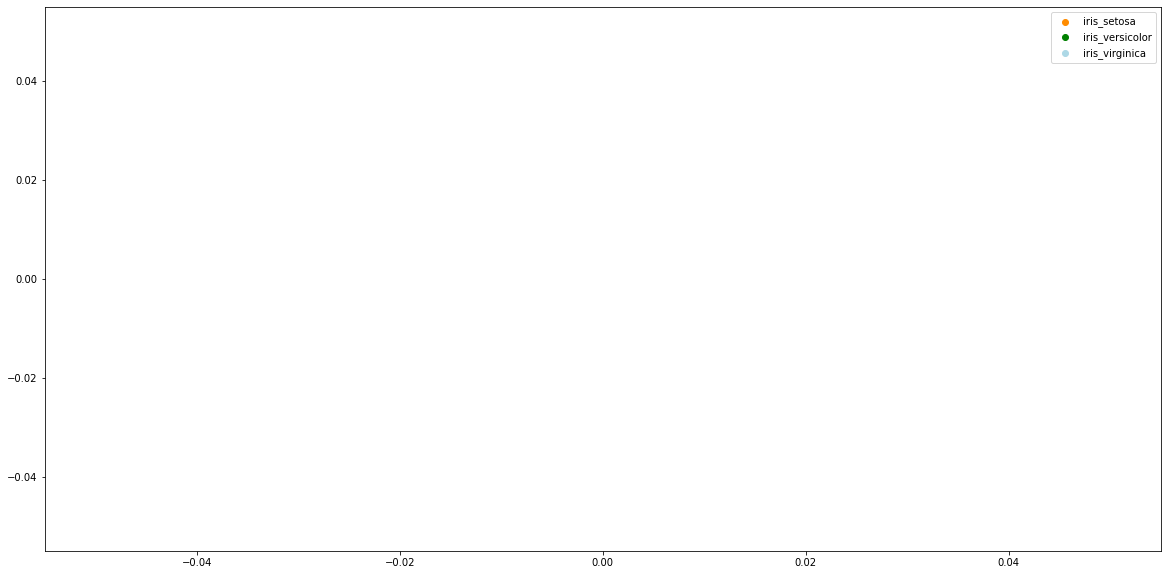

In [4]:
#visualize
iris_setosa=data[data[list(data.columns)[-1]]=='iris_setosa']
iris_versicolor=data[data[list(data.columns)[-1]]=='iris_versicolor']
iris_virginica=data[data[list(data.columns)[-1]]=='iris_virginica']

fig,axes = plt.subplots(1,1,figsize=(20,10))
axes.scatter(iris_setosa[['SepalLengthCm']],iris_setosa[['SepalWidthCm']],c='darkorange',label='iris_setosa')
axes.scatter(iris_versicolor[['SepalLengthCm']],iris_versicolor[['SepalWidthCm']],c='green',label='iris_versicolor')
axes.scatter(iris_virginica[['SepalLengthCm']],iris_virginica[['SepalWidthCm']],c='lightblue',label='iris_virginica')
axes.legend()
plt.show()

In [5]:
#labeling
from sklearn.preprocessing import LabelEncoder

x=data[list(data.columns)[:-1]]
y=data[list(data.columns)[-1]]

#initialize encoder
encoder=LabelEncoder()
encodedy=encoder.fit_transform(y)

#scaling features
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#initialize scaler
scaler=StandardScaler()
scaler.fit(x)
scaledx=scaler.transform(x)
scaledx

mxscaler=MinMaxScaler()
scaledx=mxscaler.fit_transform(x)

In [6]:
#split
from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(scaledx,encodedy,test_size=0.2,random_state=3)

In [7]:
#modeling
from sklearn import svm
#initialize
model=svm.SVC()
#train model
model.fit(xtrain,ytrain)
#test prediction
ypred=model.predict(xtest)

ypred==ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [8]:
#evaluate
from sklearn.metrics import f1_score,confusion_matrix

print("Confusion Matrix:\n ",confusion_matrix(ypred,ytest))
print("F1 Score: ",f1_score(ypred,ytest,average=None))

Confusion Matrix:
  [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
F1 Score:  [1. 1. 1.]


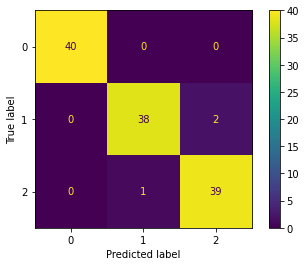

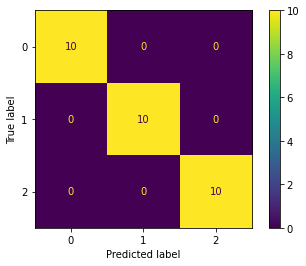

In [9]:
from sklearn import metrics

metrics.plot_confusion_matrix(model,xtrain,ytrain)
metrics.plot_confusion_matrix(model,xtest,ytest)

In [10]:
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import cross_val_score
cv = cross_val_score(
    model,scaledx,encodedy,cv=5,scoring='accuracy'
)
cv.mean()

0.9600000000000002

In [11]:
svm.SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [15]:
#hyperperameter tuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

grid=svm.SVC()

gridmodel=GridSearchCV(
    grid,
    param_grid={
     'C':list(range(3,int(np.sqrt(150)),3)),
     'kernel':['linear','rbf','poly'],
     'degree':[2,3,4,5,6],
     'gamma':['scale','auto'],
      'decision_function_shape':['ovr','ovo'],
     'max_iter':list(range(100,3000,100))
    },
    cv=5,scoring='accuracy',n_jobs=-1,verbose=3
)
gridmodel.fit(xtrain,ytrain)

Fitting 5 folds for each of 5220 candidates, totalling 26100 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [3, 6, 9],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'degree': [2, 3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800,
                                      900, 1000, 1100, 1200, 1300, 1400, 1500,
                                      1600, 1700, 1800, 1900, 2000, 2100, 2200,
                                      2300, 2400, 2500, 2600, 2700, 2800,
                                      2900]},
             scoring='accuracy', verbose=3)

In [16]:
gridmodel.best_params_

{'C': 6,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': 100}

In [17]:
finalmodel=gridmodel.best_estimator_
finalmodel

SVC(C=6, degree=2, kernel='linear', max_iter=100)

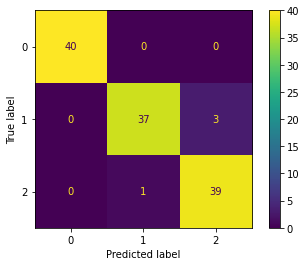

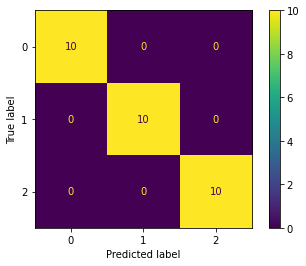

In [18]:
from sklearn import metrics

metrics.plot_confusion_matrix(finalmodel,xtrain,ytrain)
metrics.plot_confusion_matrix(finalmodel,xtest,ytest)

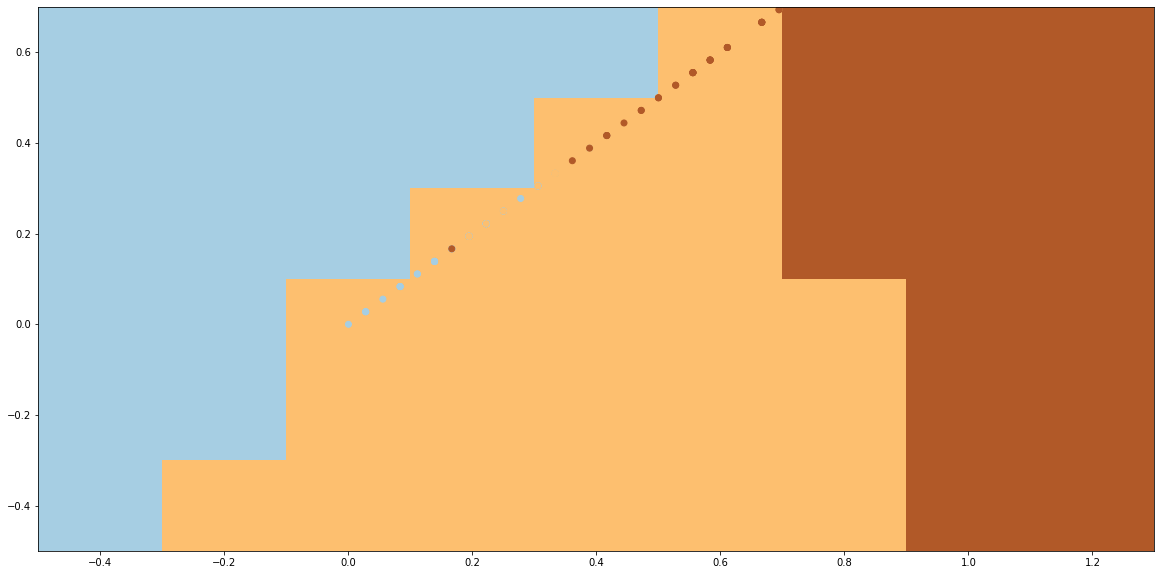

In [19]:
#analysis
clf=gridmodel.best_estimator_


clf.fit(scaledx[:,:2],encodedy)

xmin,xmax= scaledx[:,:2][:,0].min()-0.5,scaledx[:,:2][:,0].max()+0.5
ymin,ymax= scaledx[:,:2][:,:1].min()-0.5,scaledx[:,:2][0,:1].max()+0.5

xx,yy=np.meshgrid(np.arange(xmin,xmax,0.2),np.arange(ymin,ymax,0.2))
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
#color
z=z.reshape(xx.shape)
plt.figure(1,figsize=(20,10))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx,yy,z)
#plot
plt.scatter(scaledx[:,:2][:,0],scaledx[:,:2][:,:1],c=encodedy)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()